# HW 3 - Analysis of the MNIST Digit Dataset

**Author**: Ewan Lister
Completed 04/19/2023

In this notebook we will perform an analysis of the MNIST data set using multiple techniques.

### 1. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector and each column of your data matrix is a different image.

In [1]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
# define functions for flattening and reshaping images
# shapes grid into column
def column(arr):
    return arr.flatten().reshape(-1, 1)

# shapes column into grid
def grid(arr):
    return arr.reshape(28, 28)

# fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Convert the data and labels into numpy arrays
data = np.array(mnist['data'])
labels = np.array(mnist['target'])

# take transpose of data to convert to short-wide matrix
data = data.T

U, S, Vt = np.linalg.svd(data, full_matrices=False)


### 2. What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (i.e. what is the rank r of the digit space?)

The singular value spectrum follows a very hyperbolic descent from a part which captures 43% of the variance, dropping down abruptly to 5%, and then balancing out asymptotically. The rank r of the digit space is 10, but the first 10 modes only capture 69.29% of the variance found in the data set. 

[417574.10465881 141551.44098178 131066.27886703 121191.35519597
 112716.37716223 101716.93721824  93479.10539002  83716.55641369
  83066.76677773  75104.5889824   71476.98779587  70398.75699318
  64033.74747897  63983.27031843  61950.0447972   59850.43256676
  57243.18656535  55743.22004816  53440.70716664  52615.31190406
  50592.89903421  49245.0997276   48008.36202834  46777.0308228
  46077.40981292  44899.62277581  44143.54363888  43434.54018563
  42160.13197923  40705.78858077  39704.84204344  39368.54981831
  37987.54923486  37634.67926777  36891.21204105  36147.17412681
  34811.8905712   34197.63585046  33911.45134778  33513.37509051
  33062.16722611  32687.6640113   31757.4569527   30842.73975593
  30375.39067004  30040.27574243  29459.00404931  28953.76131179
  28554.56686263  27749.4758663 ]


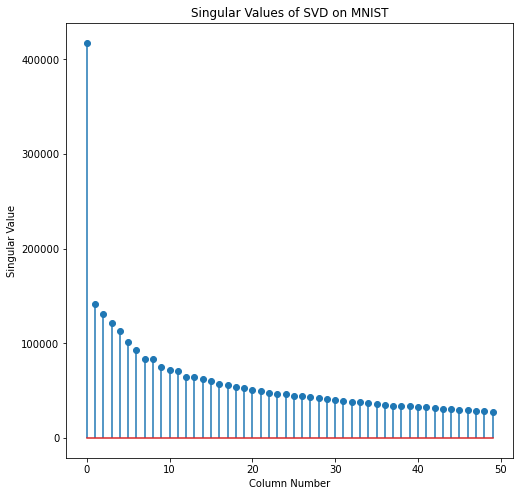

Percentage of the variance captured by Mode 1: 43.52%
Percentage of the variance captured by Mode 2: 5.00%
Percentage of the variance captured by Mode 3: 4.29%
Percentage of the variance captured by Mode 4: 3.67%
Percentage of the variance captured by Mode 5: 3.17%
Percentage of the variance captured by Mode 6: 2.58%


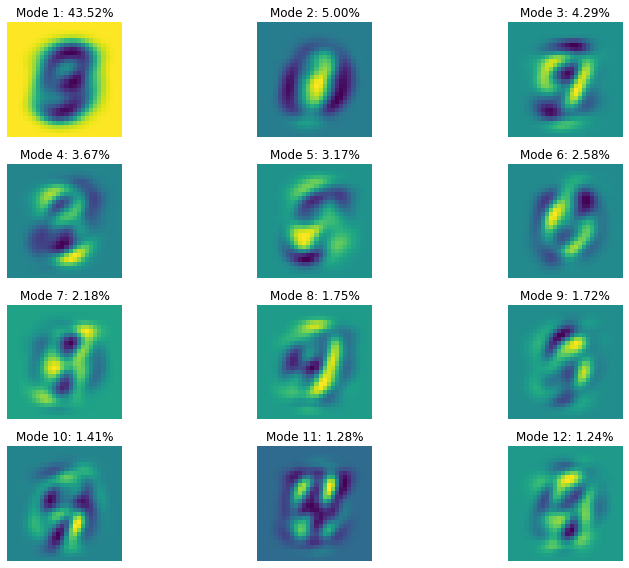

In [3]:
# initialize white facecolor for plots
w = 'white'

# print first 50 singular values
print(S[0:50])

# Plot singular values
plt.figure(figsize=(8, 8))
plt.stem(np.arange(0, 50), S[0:50])

# Set the title and axes labels
plt.title('Singular Values of SVD on MNIST')
plt.xlabel('Column Number')
plt.ylabel('Singular Value')

# Show the plot
plt.savefig('./Figures/first_50_singular_values.png', facecolor=w)
plt.show()

# Compute the total variance captured by all modes
total_variance_captured = np.sum(S ** 2)

# Compute the variance captured by each mode
variance_captured = (S ** 2) / total_variance_captured

# Convert the variance captured to percentage
percentage_variance_captured = variance_captured * 100

# Print the percentage of the variance captured by each mode
for i in range(6):
    print("Percentage of the variance captured by Mode {}: {:.2f}%".format(i+1, percentage_variance_captured[i]))

# Plot the first six modes as images
fig, axs = plt.subplots(4, 3, figsize=(12, 8))

for i in range(12):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(U[:, i].reshape(28, 28), cmap='viridis')
    axs[row, col].set_title('Mode {}: {:.2f}%'.format(i+1, percentage_variance_captured[i]))
    axs[row, col].axis('off')

plt.tight_layout()
plt.savefig('./Figures/first_12_modes.png', facecolor=w)
plt.show()


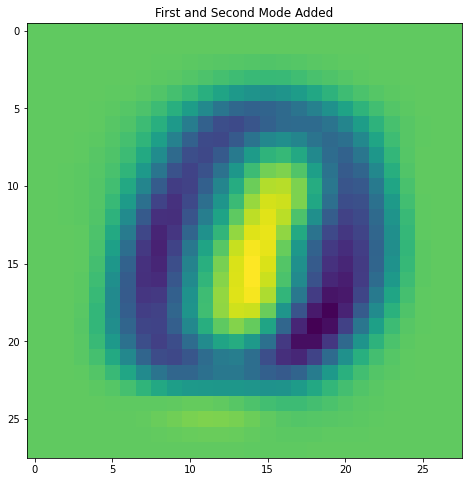

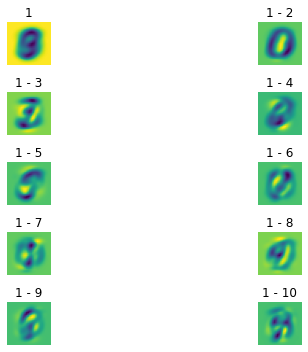

In [4]:
# Add some modes together to investigate linear combinations describing numbers.
first_and_second_modes = (np.add(U[:, 0], U[:, 1])).reshape(28, 28)

# Plot first and second modes added together
plt.figure(figsize=(8, 8))
plt.imshow(first_and_second_modes, cmap='viridis')

# Set the title and axes labels
plt.title('First and Second Mode Added')

# Show the plot
plt.savefig('./Figures/lin_combination_1_2.png')
plt.show()

dimensions = (784, 51)
lin_comb_array = np.ones(dimensions)

for i in range(51):
    lin_comb_array[:, i] = U[:, 0]

for i in range(10):
    lin_comb_array[:, i] = np.add(lin_comb_array[:, i], U[:, i])

# Plot the first six modes as images
fig, axs = plt.subplots(5, 2, figsize=(10, 5))

for i in range(10):
    row = i // 2
    col = i % 2
    axs[row, col].imshow(lin_comb_array[:, i].reshape(28, 28), cmap='viridis')
    if (i > 0):
        axs[row, col].set_title('1 - ' + str(i + 1))
    else:
        axs[row, col].set_title('1')
    axs[row, col].axis('off')

plt.tight_layout()
plt.savefig('./Figures/first_10_lin_comb.jpg', facecolor=w)
plt.show()


# 3. What is the interpretation of the U, Σ, and V matrices?

The U, $\Sigma$ and V matrices represent the transformation that the facial images data causes to a vector. 


Let's refer to the facial images data as matrix A. The columns of U form an orthonormal basis for the vector space of A, and capture the directions of maximum variance in the row space of A. In other words, the first column of U is the vector which when reshaped to image size represents the 

/var/folders/m3/0b8q92sn4bsgcqxnx_rn52900000gn/T/ipykernel_53645/656569559.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  targets = np.unique(mnist.target.astype(np.int))
/var/folders/m3/0b8q92sn4bsgcqxnx_rn52900000gn/T/ipykernel_53645/656569559.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revi

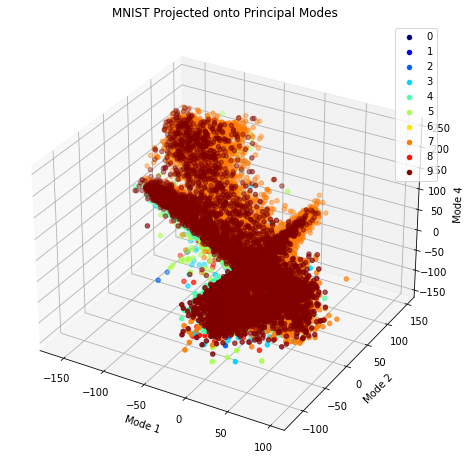

In [15]:
# perhaps include multiple plots where there are two targets each plot
# Project data onto modes 2, 3, and 5 of V matrix
modes = [1, 2, 4]
V = Vt.T
V_modes = V[modes, :]
proj_data = np.dot(mnist.data, V_modes.T)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
targets = np.unique(mnist.target.astype(np.int))
colors = plt.cm.jet(np.linspace(0, 1, len(targets)))
for target, color in zip(targets, colors):
    idx = np.where(mnist.target.astype(np.int) == target)
    ax.scatter(proj_data[idx, 0], proj_data[idx, 1], proj_data[idx, 2], c=color, label=target)
ax.set_xlabel('Mode ' + str(modes[0]))
ax.set_ylabel('Mode ' + str(modes[1]))
ax.set_zlabel('Mode ' + str(modes[2]))
ax.legend()
plt.title('MNIST Projected onto Principal Modes')
plt.savefig('./Figures/proj_3_modes_all.png', facecolor=w)
plt.show()


/var/folders/m3/0b8q92sn4bsgcqxnx_rn52900000gn/T/ipykernel_53645/1713759324.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  targets = np.unique(mnist.target.astype(np.int))
/var/folders/m3/0b8q92sn4bsgcqxnx_rn52900000gn/T/ipykernel_53645/1713759324.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to re

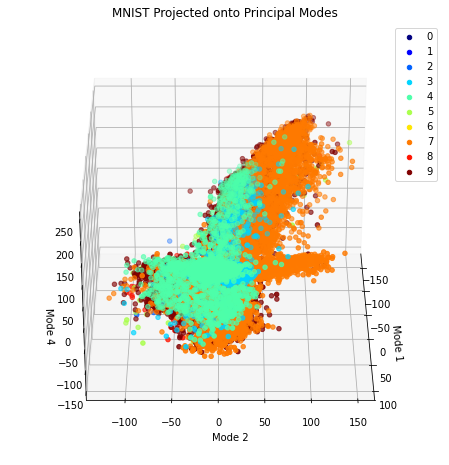

In [40]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation, ImageMagickWriter
import numpy as np


# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
targets = np.unique(mnist.target.astype(np.int))
colors = plt.cm.jet(np.linspace(0, 1, len(targets)))
for target, color in zip(targets, colors):
    idx = np.where(mnist.target.astype(np.int) == target)
    ax.scatter(proj_data[idx, 0], proj_data[idx, 1], proj_data[idx, 2], c=color, label=target)
ax.set_xlabel('Mode ' + str(modes[0]))
ax.set_ylabel('Mode ' + str(modes[1]))
ax.set_zlabel('Mode ' + str(modes[2]))
ax.legend()
plt.title('MNIST Projected onto Principal Modes')

# Define the update function for the animation
def update(angle):
    ax.view_init(30, angle)  # Rotate the graph
    return ax.collections

# Create the animation
anim = FuncAnimation(fig, update, frames=np.linspace(0, 360, 100), interval=50)

# Save the animation as a GIF
writer = ImageMagickWriter(fps=20)
anim.save('./Figures/proj_3_modes_all.gif', writer=writer)

# Show the animation
plt.show()


In [50]:
def update(angle):
    ax.view_init(30, angle)  # Rotate the graph
    return ax.collections

# Create the animation
anim = FuncAnimation(fig, update, frames=np.linspace(0, 360, 100), interval=50)

# Save the animation as a GIF
writer = ImageMagickWriter(fps=10)
anim.save('./Figures/proj_3_modes_all.gif', writer=writer)

# Show the animation
plt.show()

Once you have performed the above and have your data projected into PCA space, you will build a
classifier to identify individual digits in the training set.

Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify
them.

In [51]:
X = np.array(mnist['data'])
X = X.T
y = np.array(mnist['target'])

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)


In [52]:
dig1 = '1'
dig2 = '2'

mask1 = y == dig1
mask2 = y == dig2

# # Define a list of all possible pairs of digits
# digit_pairs = [(i, j) for i in range(10) for j in range(i + 1, 10)]

# # Initialize a dictionary to store the data and labels
data_dict = {}

X_1 = X[:, mask1]
X_2 = X[:, mask2]
y_1 = np.zeros(len(X_1[0]))
y_2 = np.ones(len(X_2[0]))

# Merge the images and labels into a single dataset
X_dig = np.concatenate((X_1, X_2), axis=1)
X_dig = X_dig.T
y_dig = np.concatenate((y_1, y_2))

X_train, X_test, y_train, y_test = train_test_split(X_dig, y_dig, test_size=0.3, random_state=42)
data_dict[('1','2')] = (X_train, y_train, X_test, y_test)

one_two = ('1', '2')
X_train = data_dict[one_two][0]
y_train = data_dict[one_two][1]
X_test = data_dict[one_two][2]
y_test = data_dict[one_two][3]

# Train a linear classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Evaluate the performance on the test set
y_pred = lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy for digits {(1, 2)}: {acc:.2f}")


Accuracy for digits (1, 2): 0.98


Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy
of the separation with LDA on the test data.

7 and 9 are the most difficult digits to separate. An applied LDA fit separates them with 0.9558 accuracy.

In [53]:
# fits an LDA classifier to training and test data specified by train_set
# prints accuracy
def fit_and_err(lda, train_set, pair):
    X_train = train_set[0]
    y_train = train_set[1]
    X_test = train_set[2]
    y_test = train_set[3]   
    # Train a linear classifier
    lda.fit(X_train, y_train)
    # Evaluate the performance on the test set
    y_pred = lda.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for digits {pair}: {acc:.5f}")
    return acc

# Define a list of all possible pairs of digits
digit_pairs = [(i, j) for i in range(10) for j in range(i + 1, 10)]

# Initialize a dictionary to store the data and labels
data_dict = {}

# Loop over all pairs of digits
for digit_pair in digit_pairs:
    dig1 = str(digit_pair[0])
    dig2 = str(digit_pair[1])

    mask1 = y == dig1
    mask2 = y == dig2

    X_1 = X[:, mask1]
    X_2 = X[:, mask2]
    y_1 = np.zeros(len(X_1[0]))
    y_2 = np.ones(len(X_2[0]))

    # Merge the images and labels into a single dataset
    X_dig = np.concatenate((X_1, X_2), axis=1)
    X_dig = X_dig.T
    y_dig = np.concatenate((y_1, y_2))

    X_train, X_test, y_train, y_test = train_test_split(X_dig, y_dig, test_size=0.3, random_state=42)
    data_dict[digit_pair] = (X_train, y_train, X_test, y_test)

acc_for_pairs = np.zeros((10, 10))

for pair in digit_pairs:
    train_set = data_dict[pair]
    accuracy = fit_and_err(lda, train_set, pair)
    acc_for_pairs[pair[0]][pair[1]] = accuracy
    acc_for_pairs[pair[1]][pair[0]] = accuracy


Accuracy for digits (0, 1): 0.99233
Accuracy for digits (0, 2): 0.98129
Accuracy for digits (0, 3): 0.98932
Accuracy for digits (0, 4): 0.99150
Accuracy for digits (0, 5): 0.97982
Accuracy for digits (0, 6): 0.98936
Accuracy for digits (0, 7): 0.99460
Accuracy for digits (0, 8): 0.98446
Accuracy for digits (0, 9): 0.99110
Accuracy for digits (1, 2): 0.98207
Accuracy for digits (1, 3): 0.98535
Accuracy for digits (1, 4): 0.99229
Accuracy for digits (1, 5): 0.98591
Accuracy for digits (1, 6): 0.99164
Accuracy for digits (1, 7): 0.98770
Accuracy for digits (1, 8): 0.96418
Accuracy for digits (1, 9): 0.99191
Accuracy for digits (2, 3): 0.96509
Accuracy for digits (2, 4): 0.97949
Accuracy for digits (2, 5): 0.97494
Accuracy for digits (2, 6): 0.97620
Accuracy for digits (2, 7): 0.97736
Accuracy for digits (2, 8): 0.96429
Accuracy for digits (2, 9): 0.98399
Accuracy for digits (3, 4): 0.99045
Accuracy for digits (3, 5): 0.95665
Accuracy for digits (3, 6): 0.99025
Accuracy for digits (3, 7): 

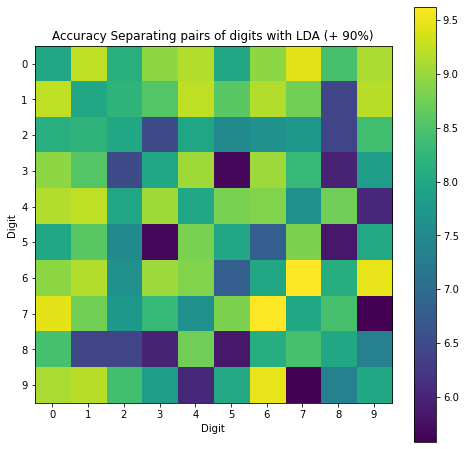

79 67


In [54]:
acc_for_pairs1 = (acc_for_pairs * 100) - 90

np.fill_diagonal(acc_for_pairs1, 8)

# Plot the accuracy matrix
plt.figure(figsize=(8, 8))
plt.imshow(acc_for_pairs1, cmap='viridis')
plt.colorbar()

# Set the title and axes labels
plt.title('Accuracy Separating pairs of digits with LDA (+ 90%)')
plt.xlabel('Digit')
plt.ylabel('Digit')

# Adjust the axes range and ticks
plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10))

# Show the plot
plt.savefig('./Figures/acc_lda_mat.png', facecolor=w)
plt.show()

min_idx = np.argmin(acc_for_pairs1)
max_idx = np.argmax(acc_for_pairs1)

print(min_idx, max_idx)


Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation
with LDA on the test data.

6 and 7 are the easiest digits to separate, with an accuracy of 0.99624.

SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about 2014. How well do these separate between all ten digits? (see code below to get started).

In [55]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

# Create a Support Vector Machine (SVM) classifier
clf = SVC()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9787857142857143


Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair
of digits to separate (from above).


In [56]:

dtc = DecisionTreeClassifier()
clf = SVC()
lda = LinearDiscriminantAnalysis()

worst_digs = (7, 9)
best_digs = (6, 7)
worst_set = data_dict[worst_digs]
best_set = data_dict[best_digs]

In [57]:
# fit lda
lda_worst = fit_and_err(lda, worst_set, worst_digs)
lda_best = fit_and_err(lda, best_set, best_digs)

Accuracy for digits (7, 9): 0.95580
Accuracy for digits (6, 7): 0.99624


In [58]:
# fit SVM
svm_worst = fit_and_err(clf, worst_set, worst_digs)
svm_best = fit_and_err(clf, best_set, best_digs)

Accuracy for digits (7, 9): 0.98901
Accuracy for digits (6, 7): 0.99953


In [59]:
# fit dtc
dtc_worst = fit_and_err(dtc, worst_set, worst_digs)
dtc_best = fit_and_err(dtc, best_set, best_digs)

Accuracy for digits (7, 9): 0.97568
Accuracy for digits (6, 7): 0.99459
